## Example of visualizing the results after querying the database

In [1]:
from server import Database

db = Database('server1.sqlite')


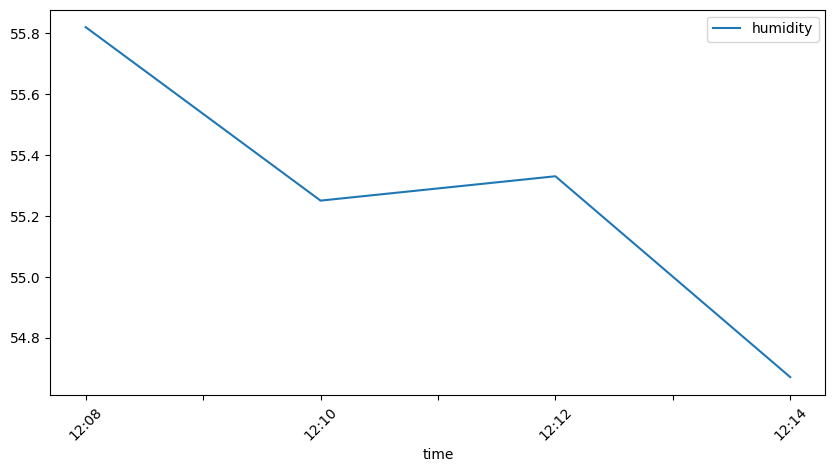

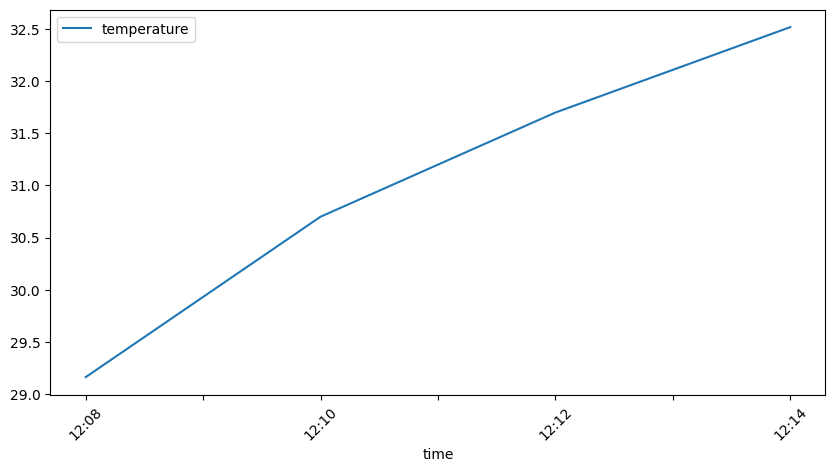

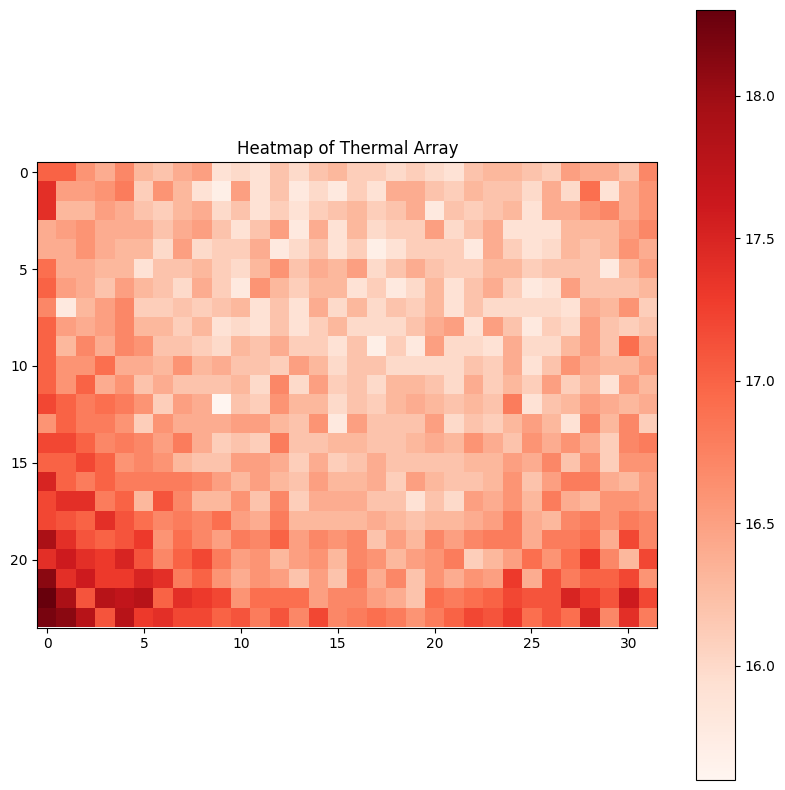

In [2]:
"""You can modify this code to visualize the data you want to observe."""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# get data humidity, temperature, thermal_array
sensors_data = db.raw_query(
    "SELECT nodeId, time, humidity, temperature, thermalArray FROM SensorData WHERE nodeId = 1001")
# format: [(1001, '2022-11-08 12:08:00', 55.82, 29.16, '[12.9, 12.0, 13.0, 13.2, 13.5, 1...')]
df = pd.DataFrame(sensors_data)
df.columns = ['nodeId', 'time', 'humidity', 'temperature', 'thermal_array']

# get data thermal_array of last index
thermal_array = df['thermal_array'].iloc[-1]

# plot time series of humidity, time show only hour and minute and rotate xticks
df['time'] = pd.to_datetime(df['time'])
df['time'] = df['time'].dt.strftime('%H:%M')
df.plot(x='time', y=['humidity'], figsize=(10, 5))
plt.xticks(rotation=45)
plt.show()

# plot heatmap of thermal_array
df.plot(x='time', y=['temperature'], figsize=(10, 5))
plt.xticks(rotation=45)
plt.show()

# convert string to list
thermal_array = thermal_array.replace('[', '').replace(']', '').split(',')
# convert string to float
thermal_array = [float(i) for i in thermal_array]
# convert list to numpy array
thermal_array = np.array(thermal_array)
# reshape array to 24x32
thermal_array = thermal_array.reshape(24, 32)

# plot heatmap
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(thermal_array, cmap='Reds', interpolation='nearest')
ax.set_title('Heatmap of Thermal Array')
fig.colorbar(im)
plt.show()

# time.sleep(5)
